In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.grid_objs import Column, Grid
import plotly.offline as offline
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline


plotly.tools.set_credentials_file(username='aromerony', api_key='fiXSf2viVHJtMEz1akU2')

In [103]:
df = pd.read_csv('../alexromero/Bootcamp/ML Project/train.csv', )

In [104]:
df.info() #No null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [105]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [106]:
def preprocess(text):
    text = text.str.replace(" \(all\)", "") 
    return text

In [107]:
df.MSZoning = preprocess(df.MSZoning)

In [108]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [109]:
df['LotFrontage'].unique() # some nan values

array([  65.,   80.,   68.,   60.,   84.,   85.,   75.,   nan,   51.,
         50.,   70.,   91.,   72.,   66.,  101.,   57.,   44.,  110.,
         98.,   47.,  108.,  112.,   74.,  115.,   61.,   48.,   33.,
         52.,  100.,   24.,   89.,   63.,   76.,   81.,   95.,   69.,
         21.,   32.,   78.,  121.,  122.,   40.,  105.,   73.,   77.,
         64.,   94.,   34.,   90.,   55.,   88.,   82.,   71.,  120.,
        107.,   92.,  134.,   62.,   86.,  141.,   97.,   54.,   41.,
         79.,  174.,   99.,   67.,   83.,   43.,  103.,   93.,   30.,
        129.,  140.,   35.,   37.,  118.,   87.,  116.,  150.,  111.,
         49.,   96.,   59.,   36.,   56.,  102.,   58.,   38.,  109.,
        130.,   53.,  137.,   45.,  106.,  104.,   42.,   39.,  144.,
        114.,  128.,  149.,  313.,  168.,  182.,  138.,  160.,  152.,
        124.,  153.,   46.])

In [111]:
df.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [113]:
df.iloc[df.LotFrontage[df.LotFrontage.isnull()].index].count()

Id               259
MSSubClass       259
MSZoning         259
LotFrontage        0
LotArea          259
Street           259
Alley              5
LotShape         259
LandContour      259
Utilities        259
LotConfig        259
LandSlope        259
Neighborhood     259
Condition1       259
Condition2       259
BldgType         259
HouseStyle       259
OverallQual      259
OverallCond      259
YearBuilt        259
YearRemodAdd     259
RoofStyle        259
RoofMatl         259
Exterior1st      259
Exterior2nd      259
MasVnrType       257
MasVnrArea       257
ExterQual        259
ExterCond        259
Foundation       259
                ... 
BedroomAbvGr     259
KitchenAbvGr     259
KitchenQual      259
TotRmsAbvGrd     259
Functional       259
Fireplaces       259
FireplaceQu      169
GarageType       252
GarageYrBlt      252
GarageFinish     252
GarageCars       259
GarageArea       259
GarageQual       252
GarageCond       252
PavedDrive       259
WoodDeckSF       259
OpenPorchSF  

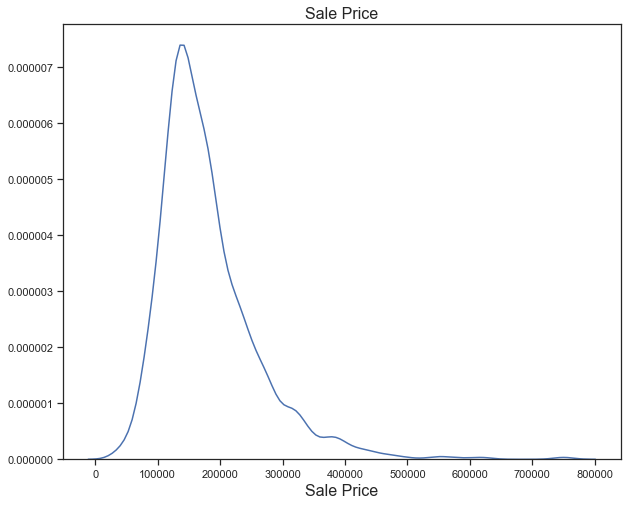

In [114]:
plt.figure(figsize=(10,8))
sns.distplot(df['SalePrice'], hist = False)
plt.title("Sale Price", fontsize=16)
plt.xlabel("Sale Price", fontsize=16)
plt.show();

Sale price does not seem to be normally distributed...skewed right

In [139]:
trace = go.Box(
x = df.SalePrice)
data = [trace]
py.iplot([go.Box(x = df.SalePrice)]) #Some major outliers

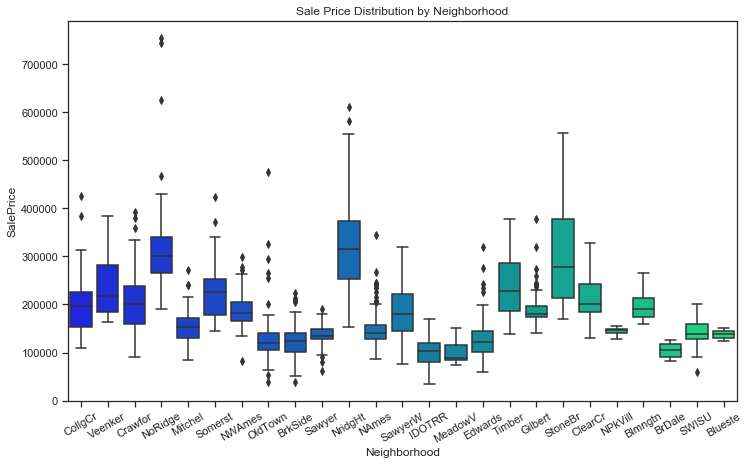

In [199]:
plt.figure(figsize=(12, 7))
n = sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='winter', )
n.set_xticklabels(df.Neighborhood.unique(), rotation = 30)
n.set_title('Sale Price Distribution by Neighborhood')
n

In [229]:
df_corrs = df.corr()['SalePrice']
df_corrs = pd.DataFrame(df_corrs)
df_corrs.columns = ["Correlation"]
df_corrs2 = df_corrs.sort_values(by=['Correlation'], ascending=False)
df_corrs2.head(10)

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## Strong correleations with Overall Quality, GrLivingArea, GarageCars, GarageArea, TotalBSmtSF, 1stFLrSF

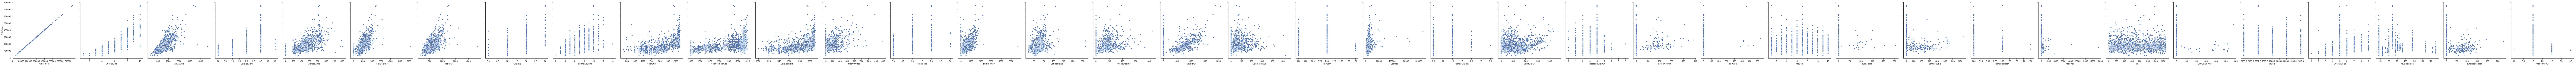

In [227]:

g = sns.pairplot(y_vars='SalePrice', x_vars = list(df_corrs2.index), data = df, height=5)

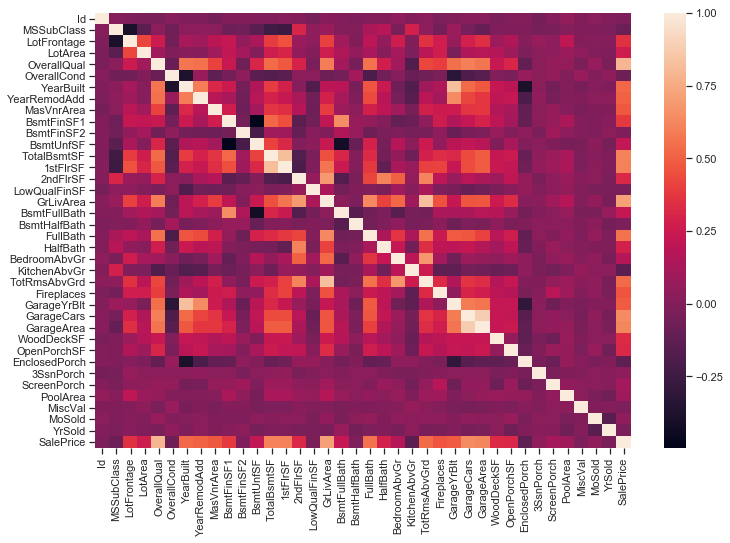

In [209]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr,)
plt.show()

In [242]:
high_sales_coors = df[['SalePrice', 'TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'OverallQual', 'GarageCars', 'GarageArea', 'FullBath']]

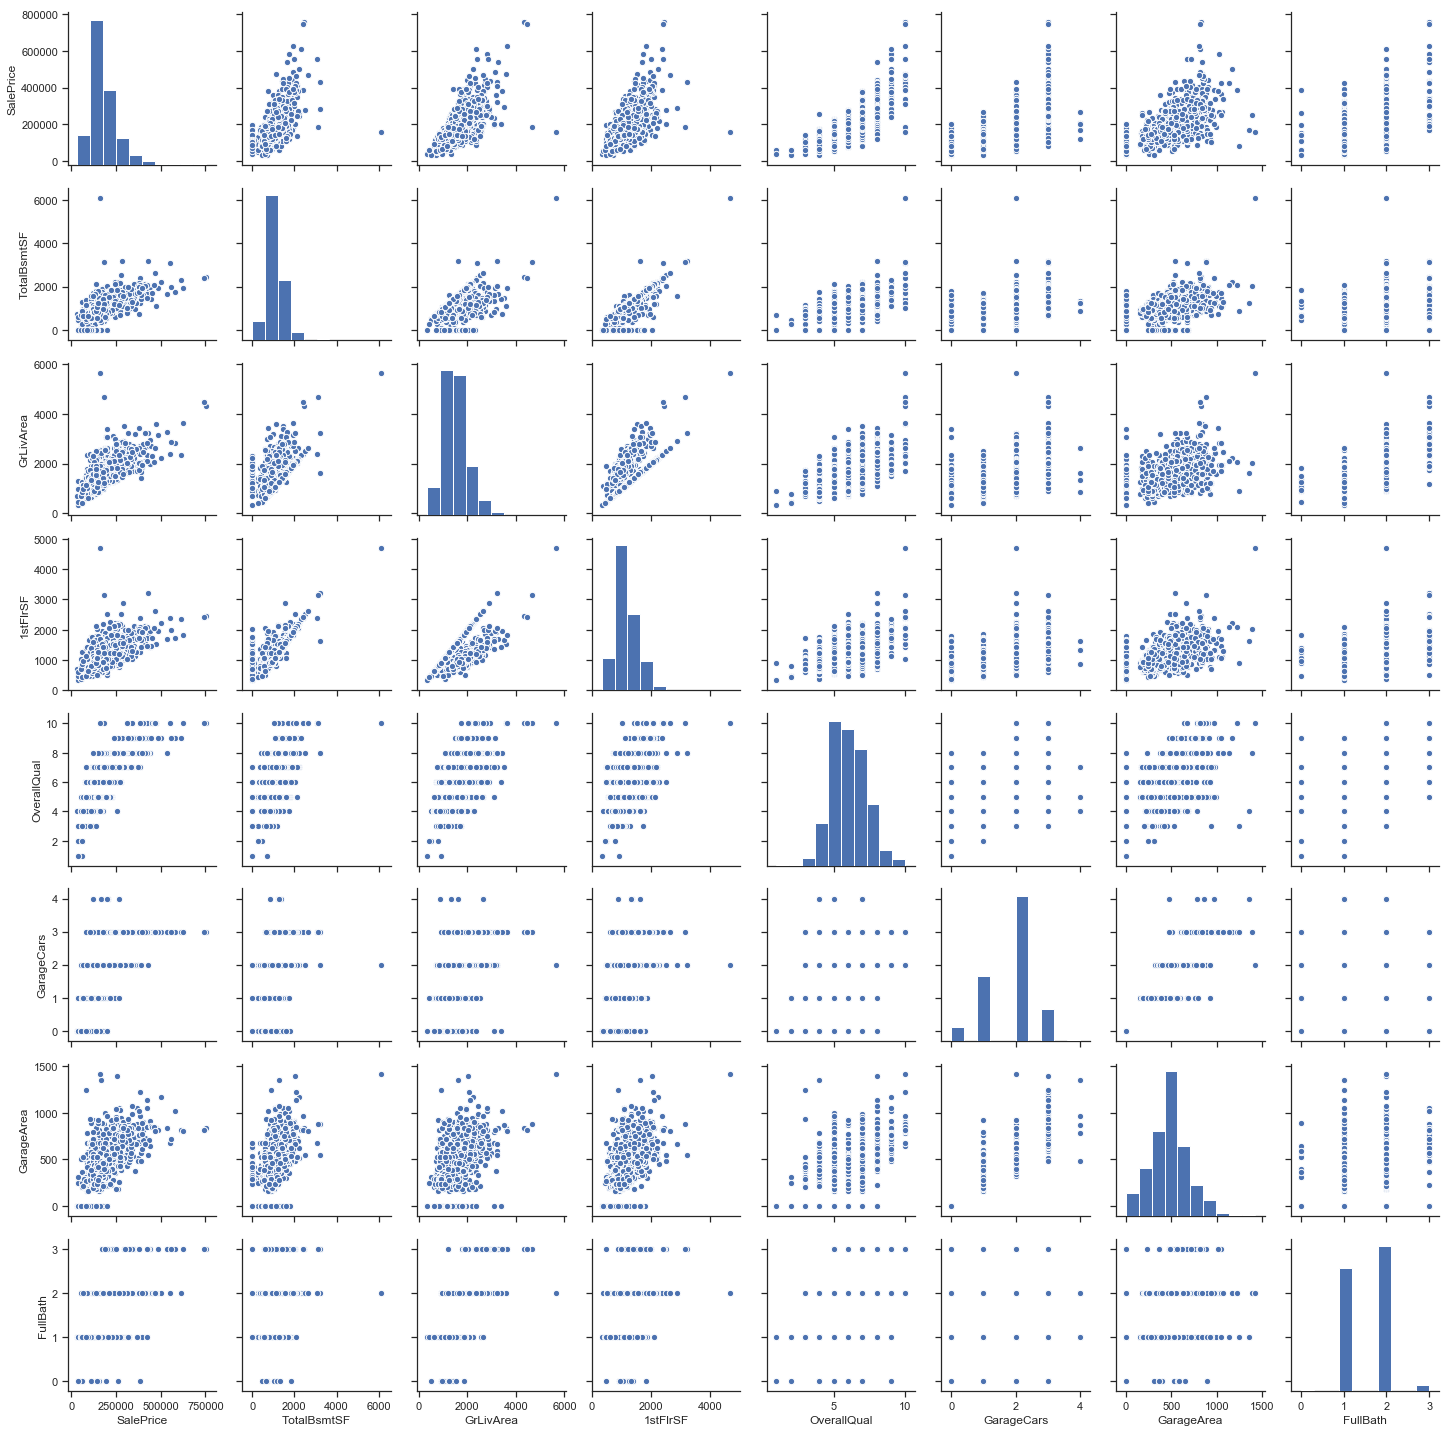

In [243]:
g = sns.pairplot(high_sales_coors)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

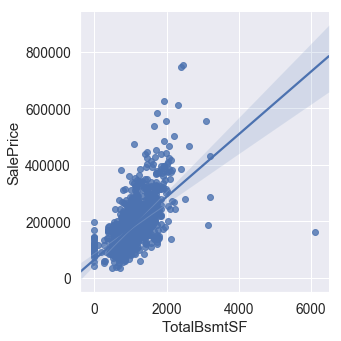

In [265]:
g = sns.lmplot('TotalBsmtSF', 'SalePrice', data = df)

In [ ]:
g = sns.lmplot()